A simple demo to use the pre-trained model for denoising an image

In [1]:
import os
import sys
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

# fixed seed
np.random.seed(2019)

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import BMCNN
sys.path.append(ROOT_DIR)
from bmcnn import utils
import bmcnn.model as nmodel



Using TensorFlow backend.


In [2]:
# Visualize before and after images
def visualize_image(img_n, im_den, psnr_n, psnr_d, title):
    """
    img_n: noisy image
    im_den: denoised image
    psnr_n: pnsr of noisy image
    psnr_d : pnsr of denoised image
    """
    plt.figure(figsize=(14, 14))
    plt.subplot(1, 2, 1)
    plt.title(title[0] + " PSNR = %2.2f dB"%psnr_n, fontsize=10)
    plt.axis('off')
    if img_n.ndim == 2:
        if np.max(img_n)>1:
            img_n = img_n/255.0
        plt.imshow(skimage.color.gray2rgb(img_n))
    else:
        plt.imshow(img_n)
    
    plt.subplot(1, 2, 2)
    plt.title(title[1] + " PSNR = %2.2f dB"%psnr_d, fontsize=10)
    plt.axis('off')
    if img_n.ndim == 2:
        if np.max(img_n)>1:
            im_den = im_den/255.0
        plt.imshow(skimage.color.gray2rgb(im_den))
    else:
        plt.imshow(im_den)

    plt.show()


## Reading images and adding noise

In [3]:
sigma = 15

img_r1 = skimage.io.imread('../testdata/barbara.png')
img_n1 = utils.addNoise(img_r1, sigma)


## Denoising with bmcnn 

In [4]:
denoiser_bmcnn = nmodel.ImageDenoiser(graph = 'bmcnn', fs = 64, model_weights = os.path.abspath("../savedmodels/model_ver2.0.h5"))

o_bm1 = denoiser_bmcnn.run(img_n1, sigma)

del  denoiser_bmcnn

## Denoising with ircnn 

In [5]:
#loading denoiser model
denoiser_ircnn = nmodel.ImageDenoiser(graph = 'ircnn', fs = 64, model_weights = os.path.abspath("../savedmodels/model_ircnn.h5"))

o_ir1 = denoiser_ircnn.run(img_n1, sigma)

del  denoiser_ircnn

## Compare results


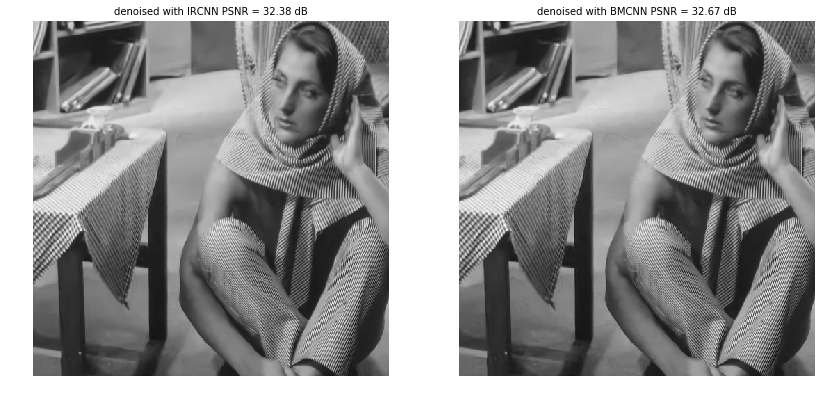

In [6]:

_, psnr_ir =  utils.mse_psnr(img_r1, o_ir1)
_, psnr_bm =  utils.mse_psnr(img_r1, o_bm1)

visualize_image(o_ir1, o_bm1, psnr_ir, psnr_bm, ["denoised with IRCNN","denoised with BMCNN"])
